<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Machine-Learning/blob/main/Bayesian_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory of Baysian Estimation

**What is Baysian Regression?**

Bayesian Regression is a way of finding a relationship between some input data and an output or result. Imagine you have a bunch of points on a graph, and you want to find a line that best represents how these points are related. Bayesian Regression helps you do this by considering not just one possible line but a whole bunch of them, each with a certain level of confidence or "belief."


This method is based on Bayes' theorem, which is a rule in probability theory that helps us update our beliefs when we get new information. In the context of regression, it means that we start with some initial guess about the relationship between our input data and the output, and then we update that guess using the actual data we have.


The formula for Bayesian Regression is a bit more complex than traditional regression techniques, but at its core, it involves calculating a probability distribution over the possible lines or relationships that could explain our data. This distribution helps us to understand not only the most likely relationship but also how confident we are about it.

Here's the formula for the Bayesian Linear Regression model:

`y = xβ + ε`

where:
y is the output (dependent) variable

X is the matrix of input (independent) variables

β is a vector of unknown parameters that we want to estimate

ε is the error term, which represents the difference between the true output 
and the model's prediction

The goal of Bayesian Regression is to estimate the most likely relationship between input and output variables while quantifying the uncertainty about that relationship.

**When to use Bayesian Regression:**

* Uncertainty quantification: If you need to quantify the uncertainty of your predictions or model parameters, Bayesian Regression can provide a full probability distribution of the estimates, unlike traditional methods.
* Small datasets: When you have a limited amount of data, Bayesian Regression can help incorporate prior knowledge about the parameters to improve the model's
performance.
* Complex relationships: Bayesian Regression allows you to incorporate non-linear and non-parametric relationships, making it more flexible for modeling complex data.
* Hierarchical modeling: If you have multi-level or hierarchical data structures, Bayesian Regression can help by sharing information across different levels of the hierarchy.
* Model comparison and selection: Bayesian Regression provides a natural framework for comparing and selecting different models using Bayesian model comparison techniques

**When not to use Bayesian Regression:**

* Large datasets: Bayesian Regression can be computationally expensive, especially for large datasets. In such cases, traditional methods like ordinary least squares may be more efficient.
* Simplicity and interpretability: If you need a simple and easily interpretable model, traditional linear regression or other simpler methods might be more appropriate.
* Real-time applications: For real-time or time-sensitive applications, Bayesian
Regression might not be suitable due to its computational demands. Lack of prior
knowledge: If you have no prior knowledge or beliefs about the model parameters,
using Bayesian Regression may not be necessary, and traditional methods might suffice.


**The California Housing Dataset**

The California Housing Dataset contains information on the median income, housing age,
and other features for census tracts in California. The dataset was originally published by
Pace, R. Kelley and Ronald Barry in their 1997 paper "Sparse Spatial Autoregressions" and is
available in the sklearn.datasets module.


The dataset consists of 20,640 instances, each representing a census tract in California.
There are eight features in the dataset, including:
* MedInc: Median income in the census tract.
* HouseAge: Median age of houses in the census tract.
* AveRooms: Average number of rooms per dwelling in the census tract.
* AveBedrms: Average number of bedrooms per dwelling in the census tract.
* Population: Total number of people living in the census tract.
* AveOccup: Average number of people per household in the census tract.
* Latitude: Latitude of the center of the census tract.
* Longitude: Longitude of the center of the census tract.

# Importing the Libraries 

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error,r2_score

# Load and Preparing Data Set

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()

In [ ]:
data_01 = pd.DataFrame(california.data , columns=california.feature_names)
data_01["MedHouseValue"] = pd.Series(california.target)

In [ ]:
data_01.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422

#Exploratory Data Analysis 

In [ ]:
data_01.shape

(20640, 9)

In [ ]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
data_01.describe ( include = "all" ).T

count         mean          std         min         25%  \
MedInc         20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge       20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms       20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms      20640.0     1.096675     0.473911    0.333333    1.006079   
Population     20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup       20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude       20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude      20640.0  -119.569704     2.003532 -124.350000 -121.800000   
MedHouseValue  20640.0     2.068558     1.153956    0.149990    1.196000   

                       50%          75%           max  
MedInc            3.534800     4.743250     15.000100  
HouseAge         29.000000    37.000000     52.000000  
AveRooms          5.229129     6.052381    141.909091  
AveBedrms         1.048780     1.099526     34.066667  
Population     1166.000000  1725.000000  35682.000000  
AveOccup          2.818116     3.282261   1243.333333  
Latitude         34.260000    37.710000     41.950000  
Longitude      -118.490000  -118.010000   -114.310000  
MedHouseValue     1.797000     2.647250      5.000010

In [ ]:
data_01.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [ ]:
data_01.duplicated().sum()

0

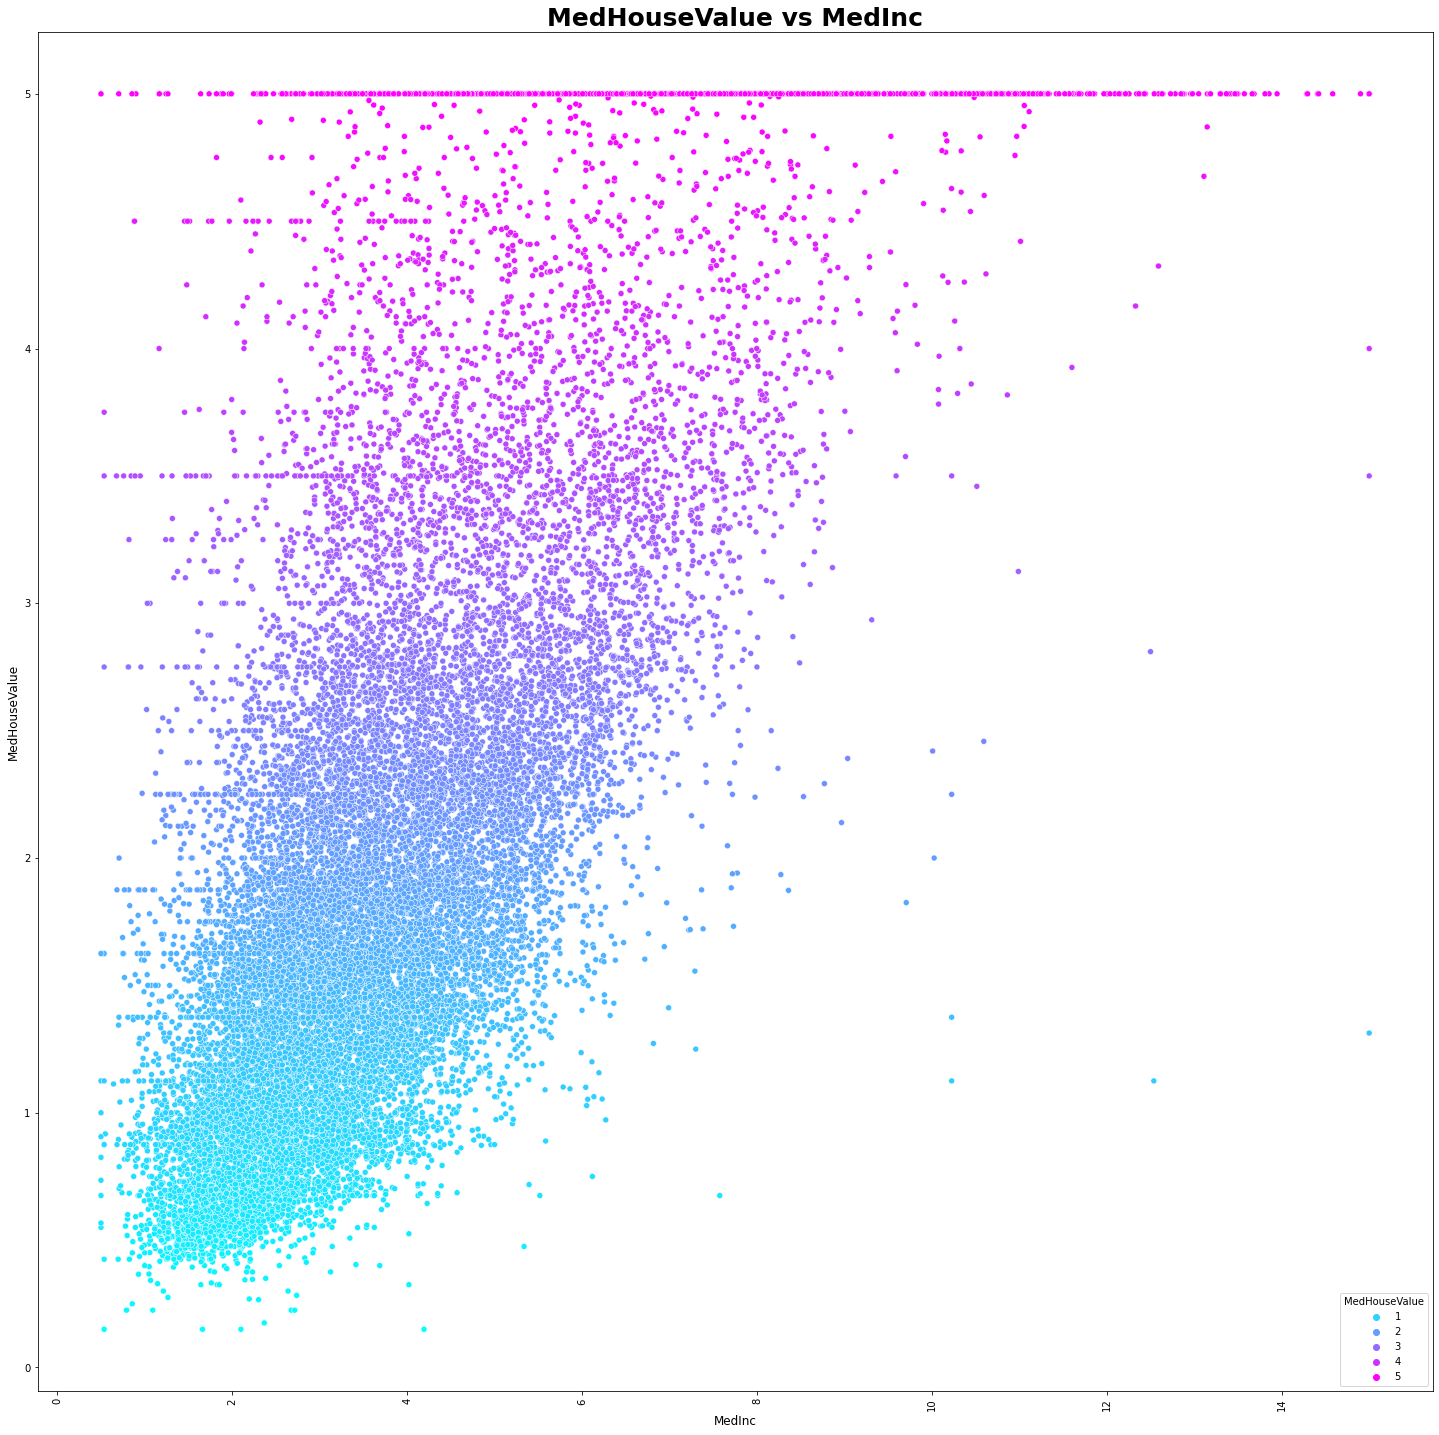

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "MedInc" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs MedInc", fontweight='bold',fontsize = 25)
plt.xlabel('MedInc', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

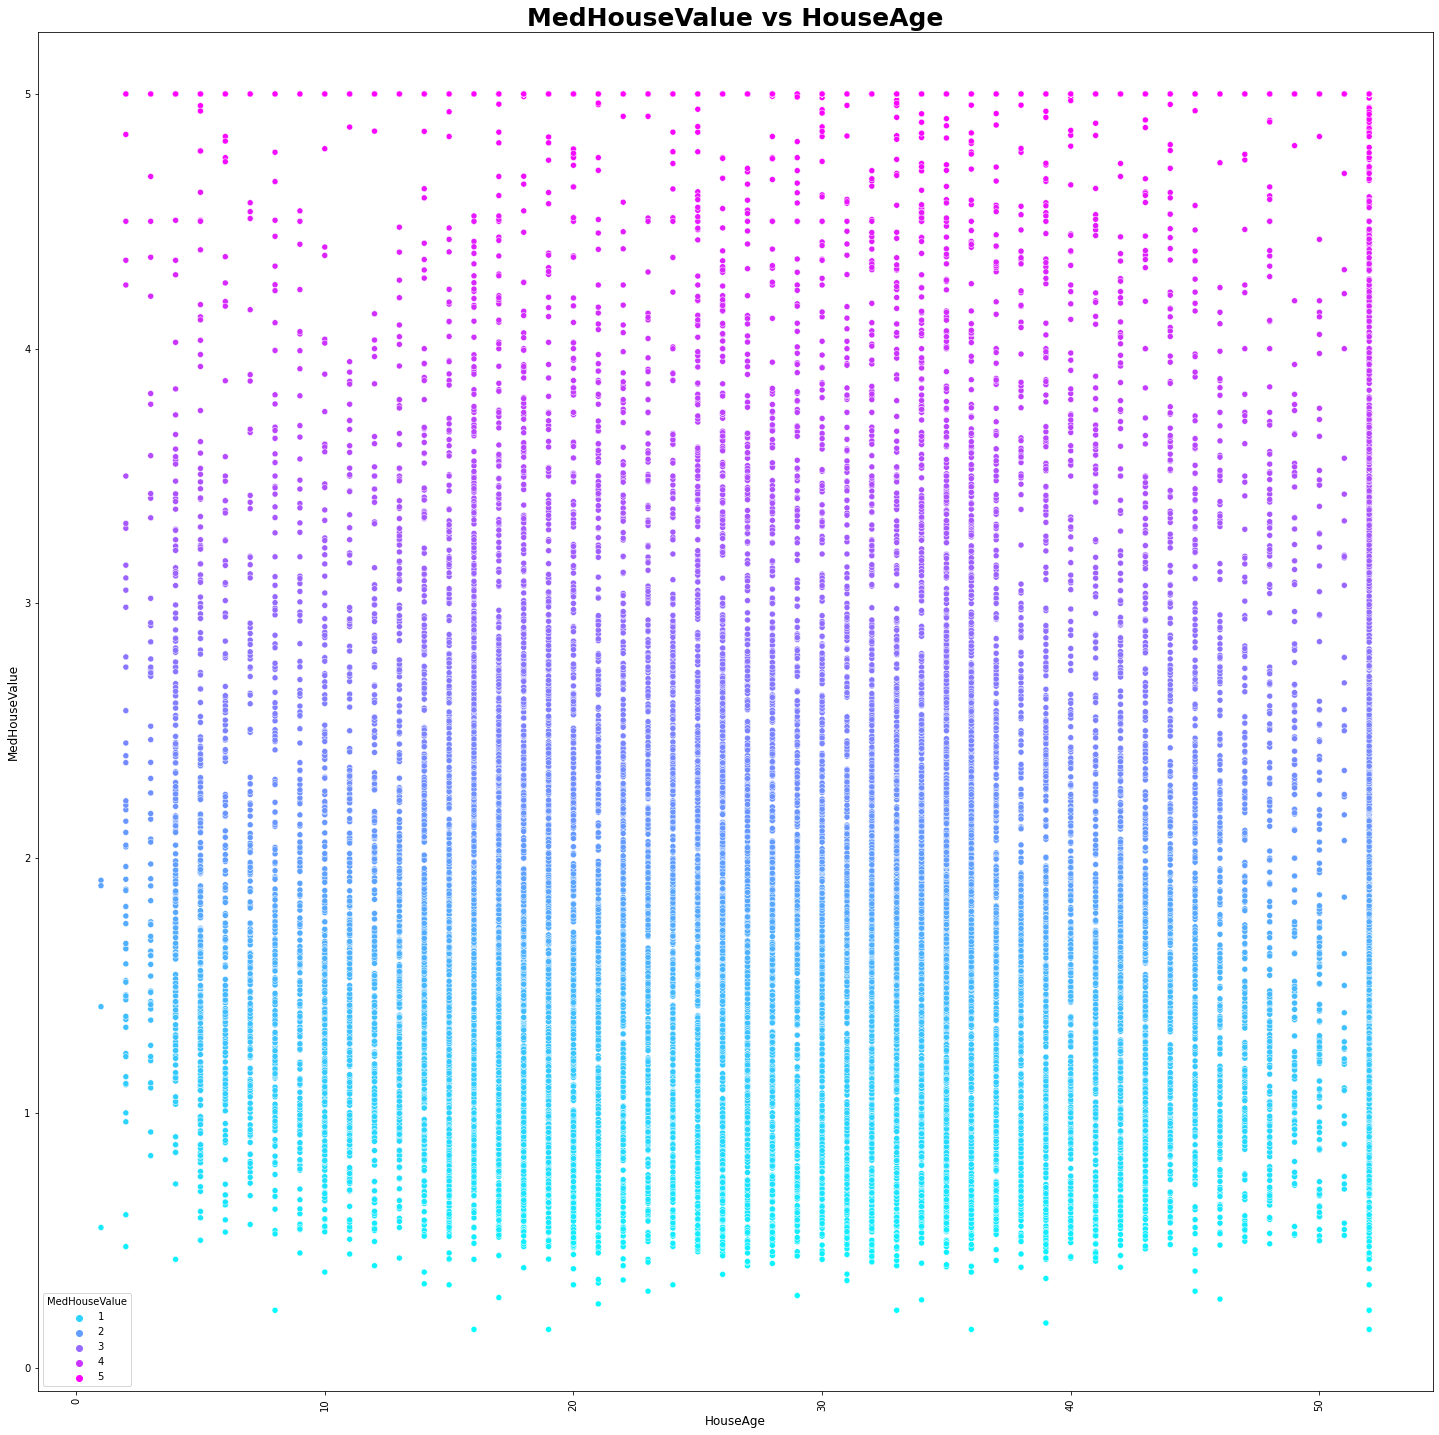

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "HouseAge" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs HouseAge", fontweight='bold',fontsize = 25)
plt.xlabel('HouseAge', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

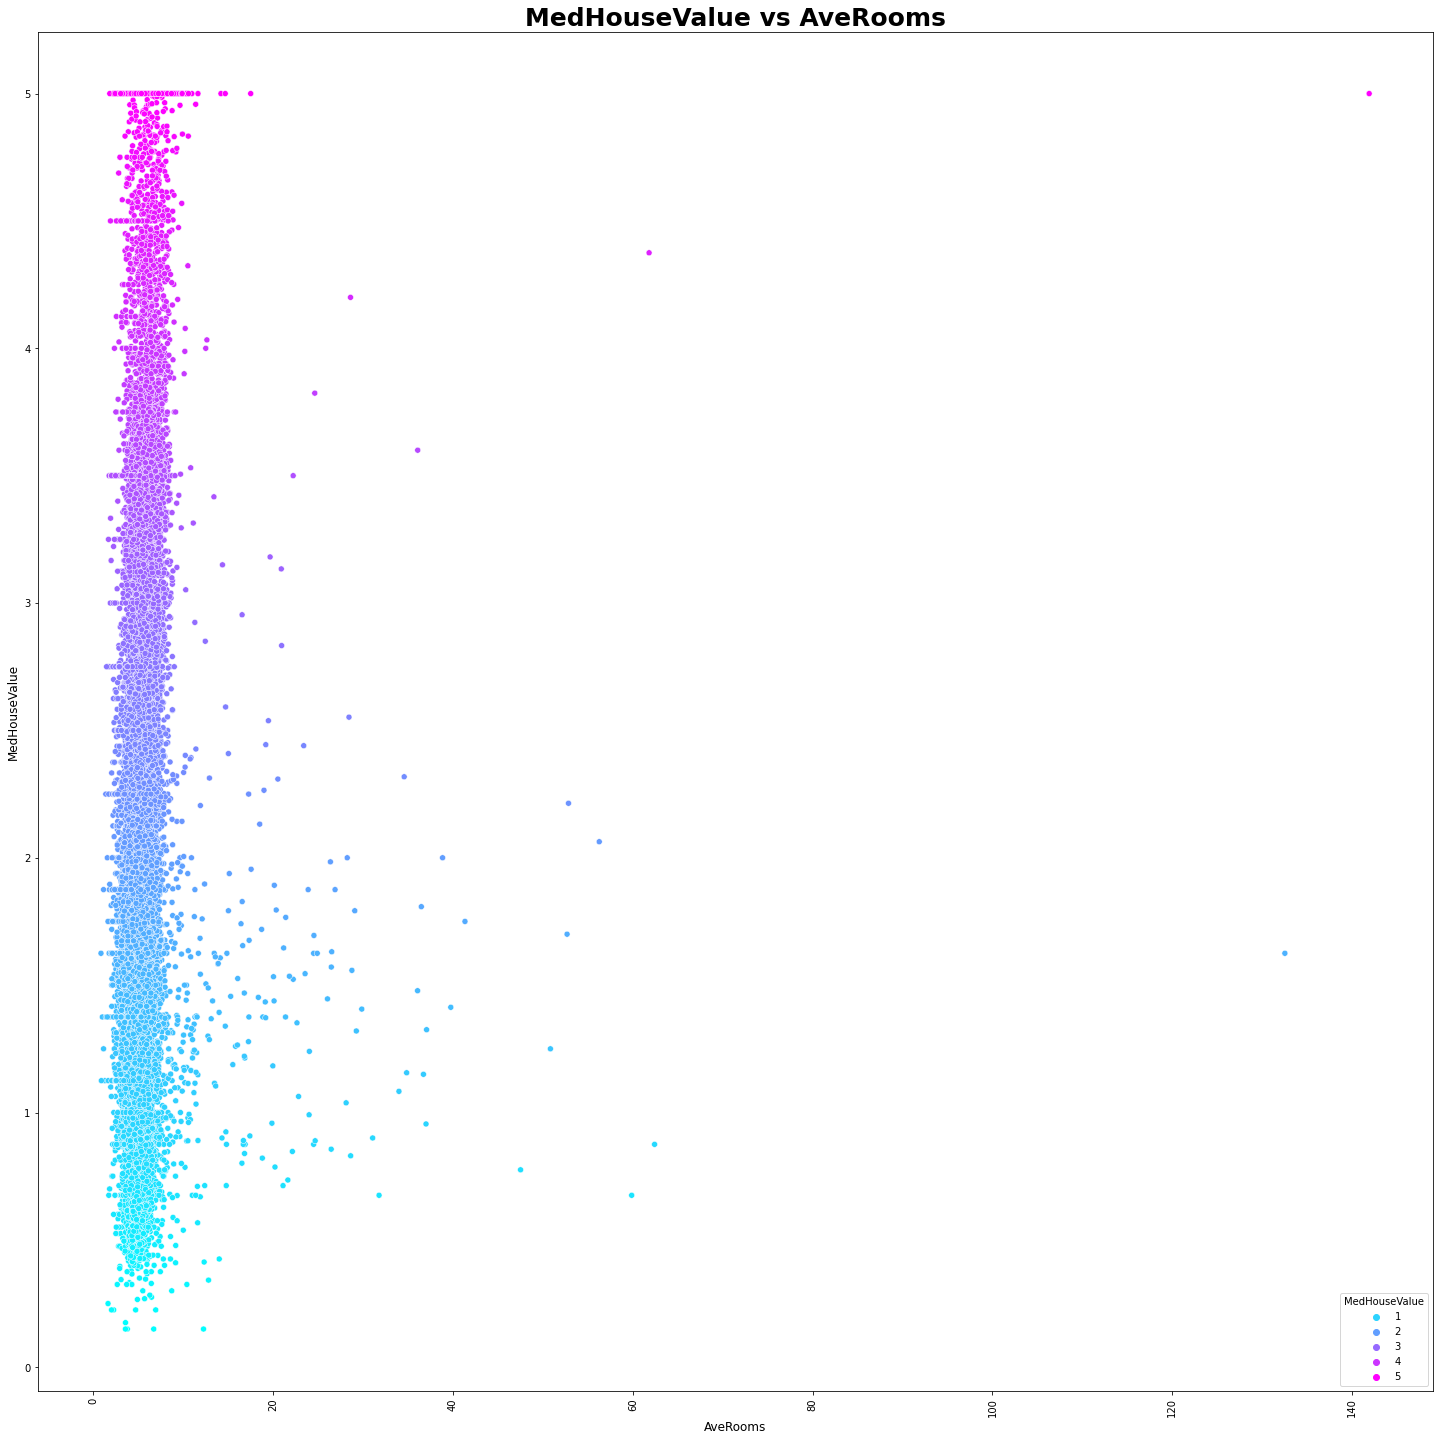

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "AveRooms" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs AveRooms", fontweight='bold',fontsize = 25)
plt.xlabel('AveRooms', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

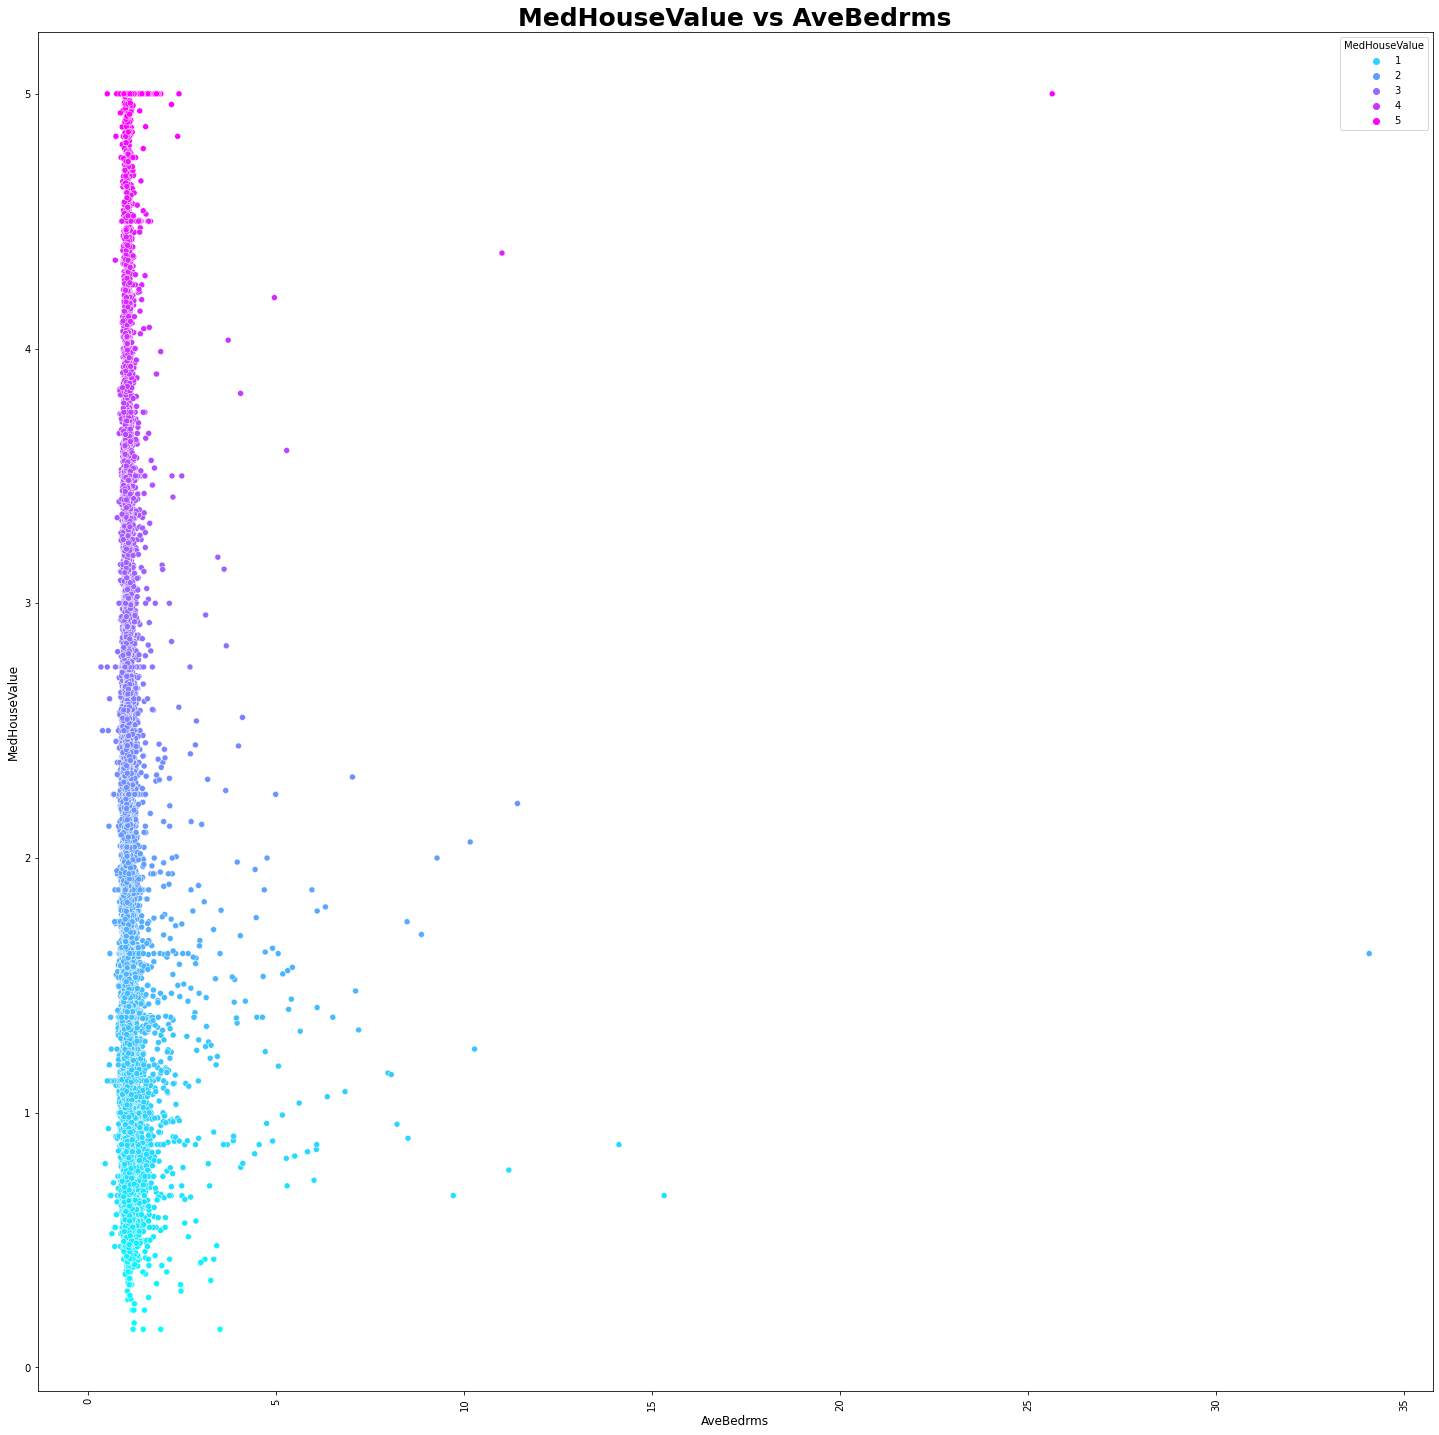

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "AveBedrms" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs AveBedrms", fontweight='bold',fontsize = 25)
plt.xlabel('AveBedrms', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

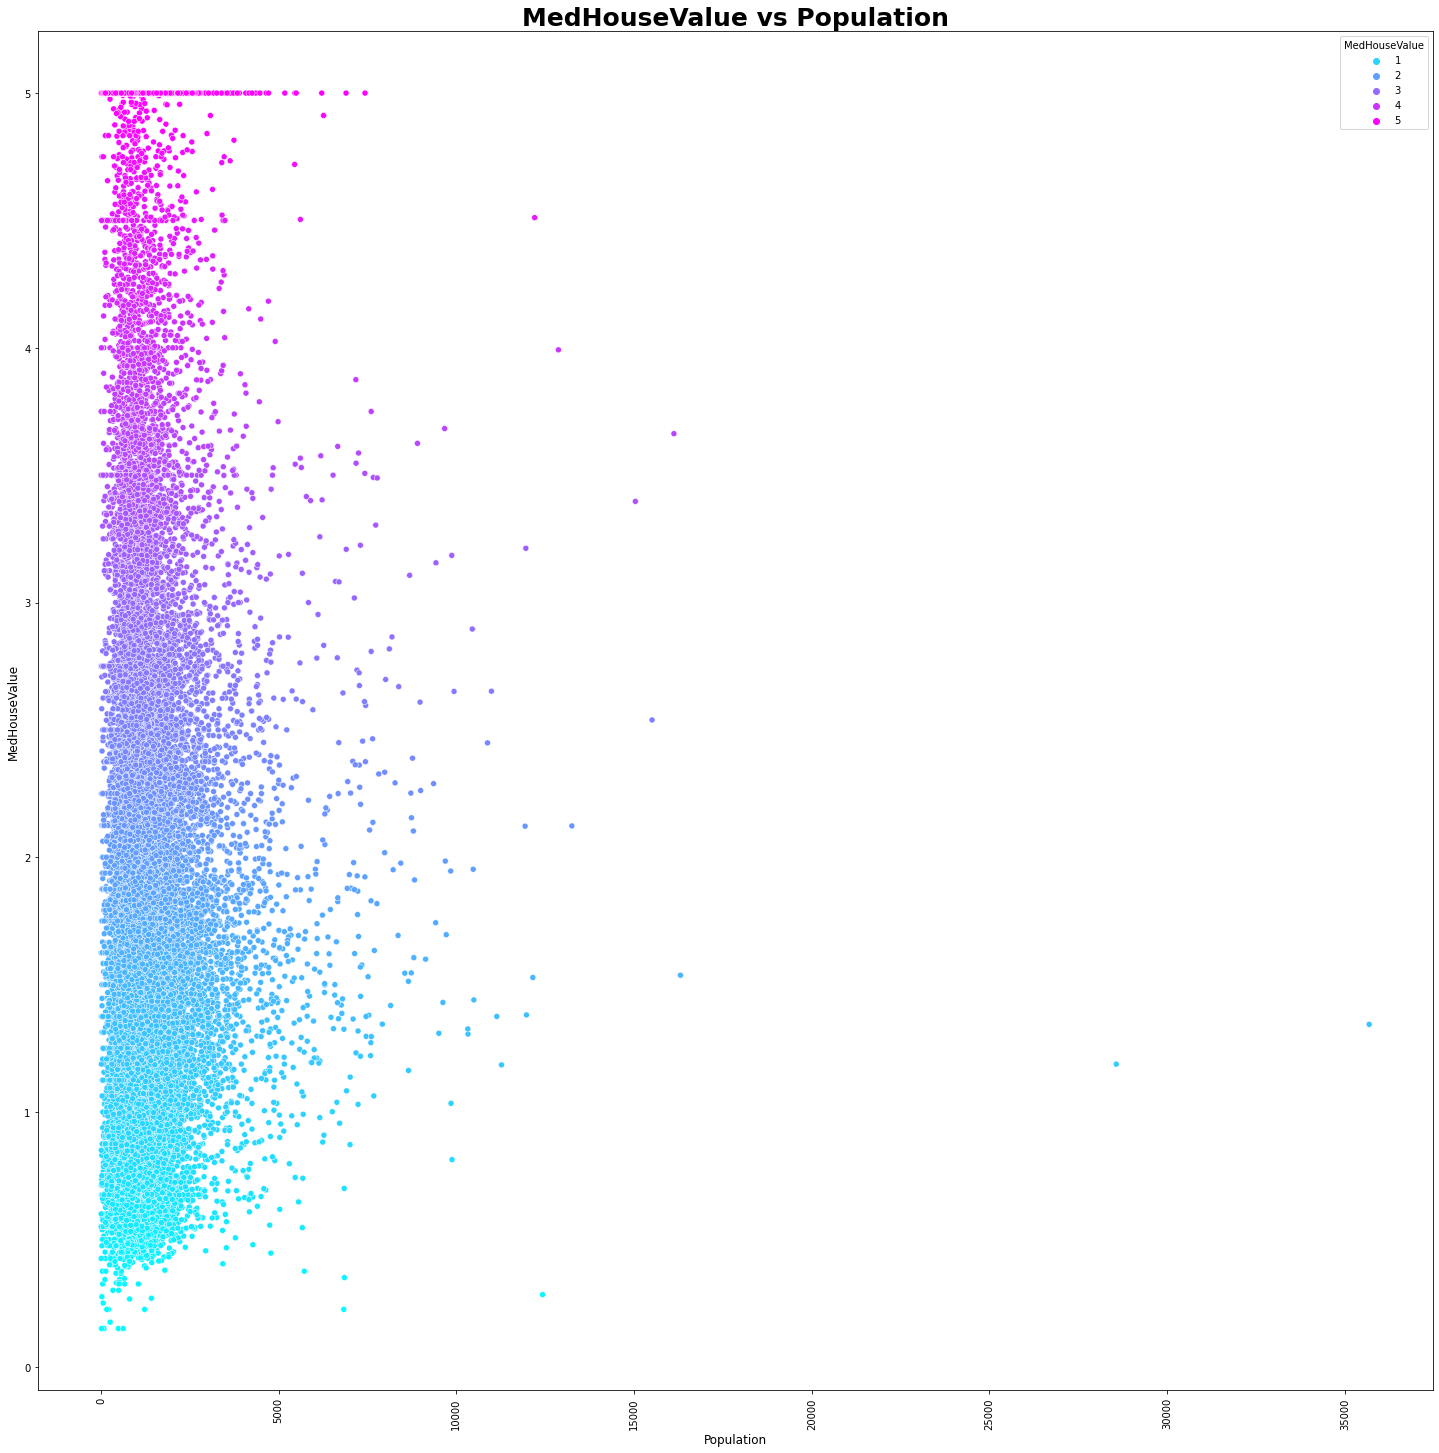

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "Population" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs Population", fontweight='bold',fontsize = 25)
plt.xlabel('Population', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

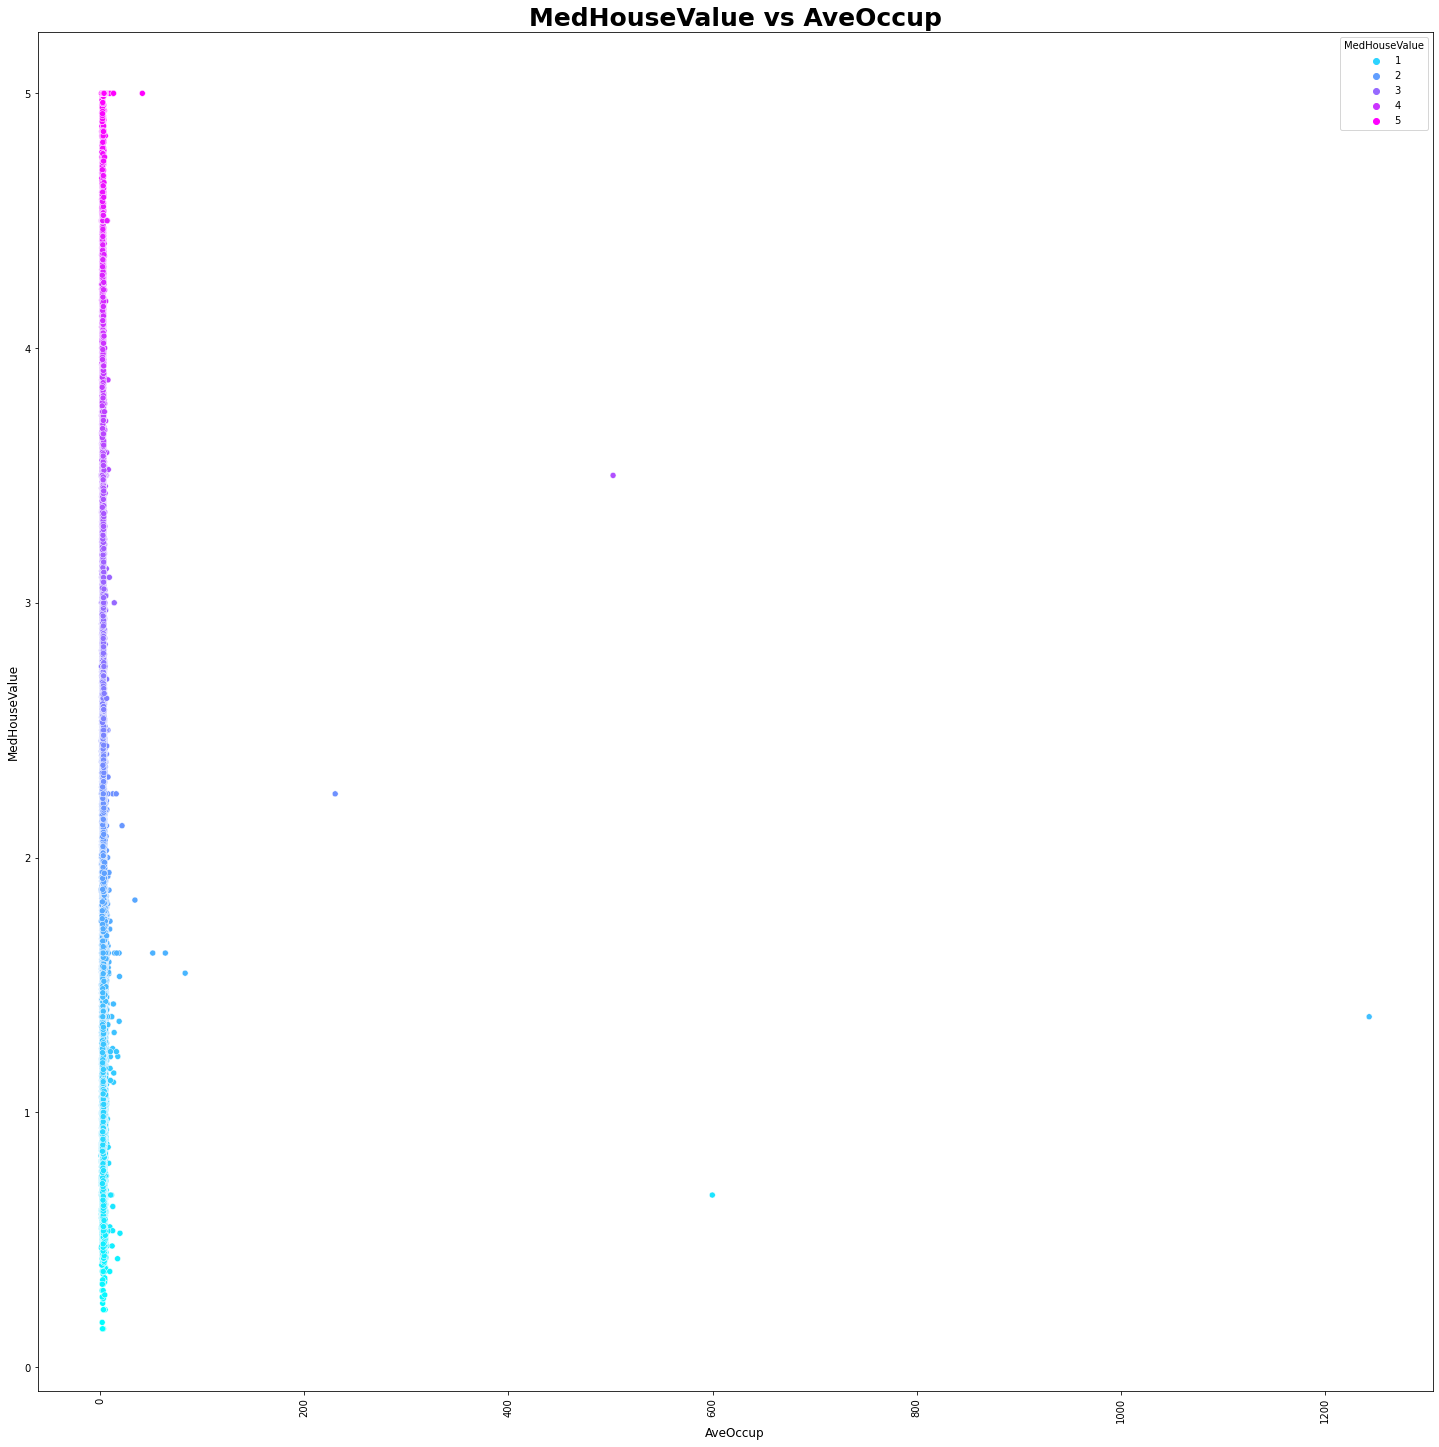

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "AveOccup" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs AveOccup", fontweight='bold',fontsize = 25)
plt.xlabel('AveOccup', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

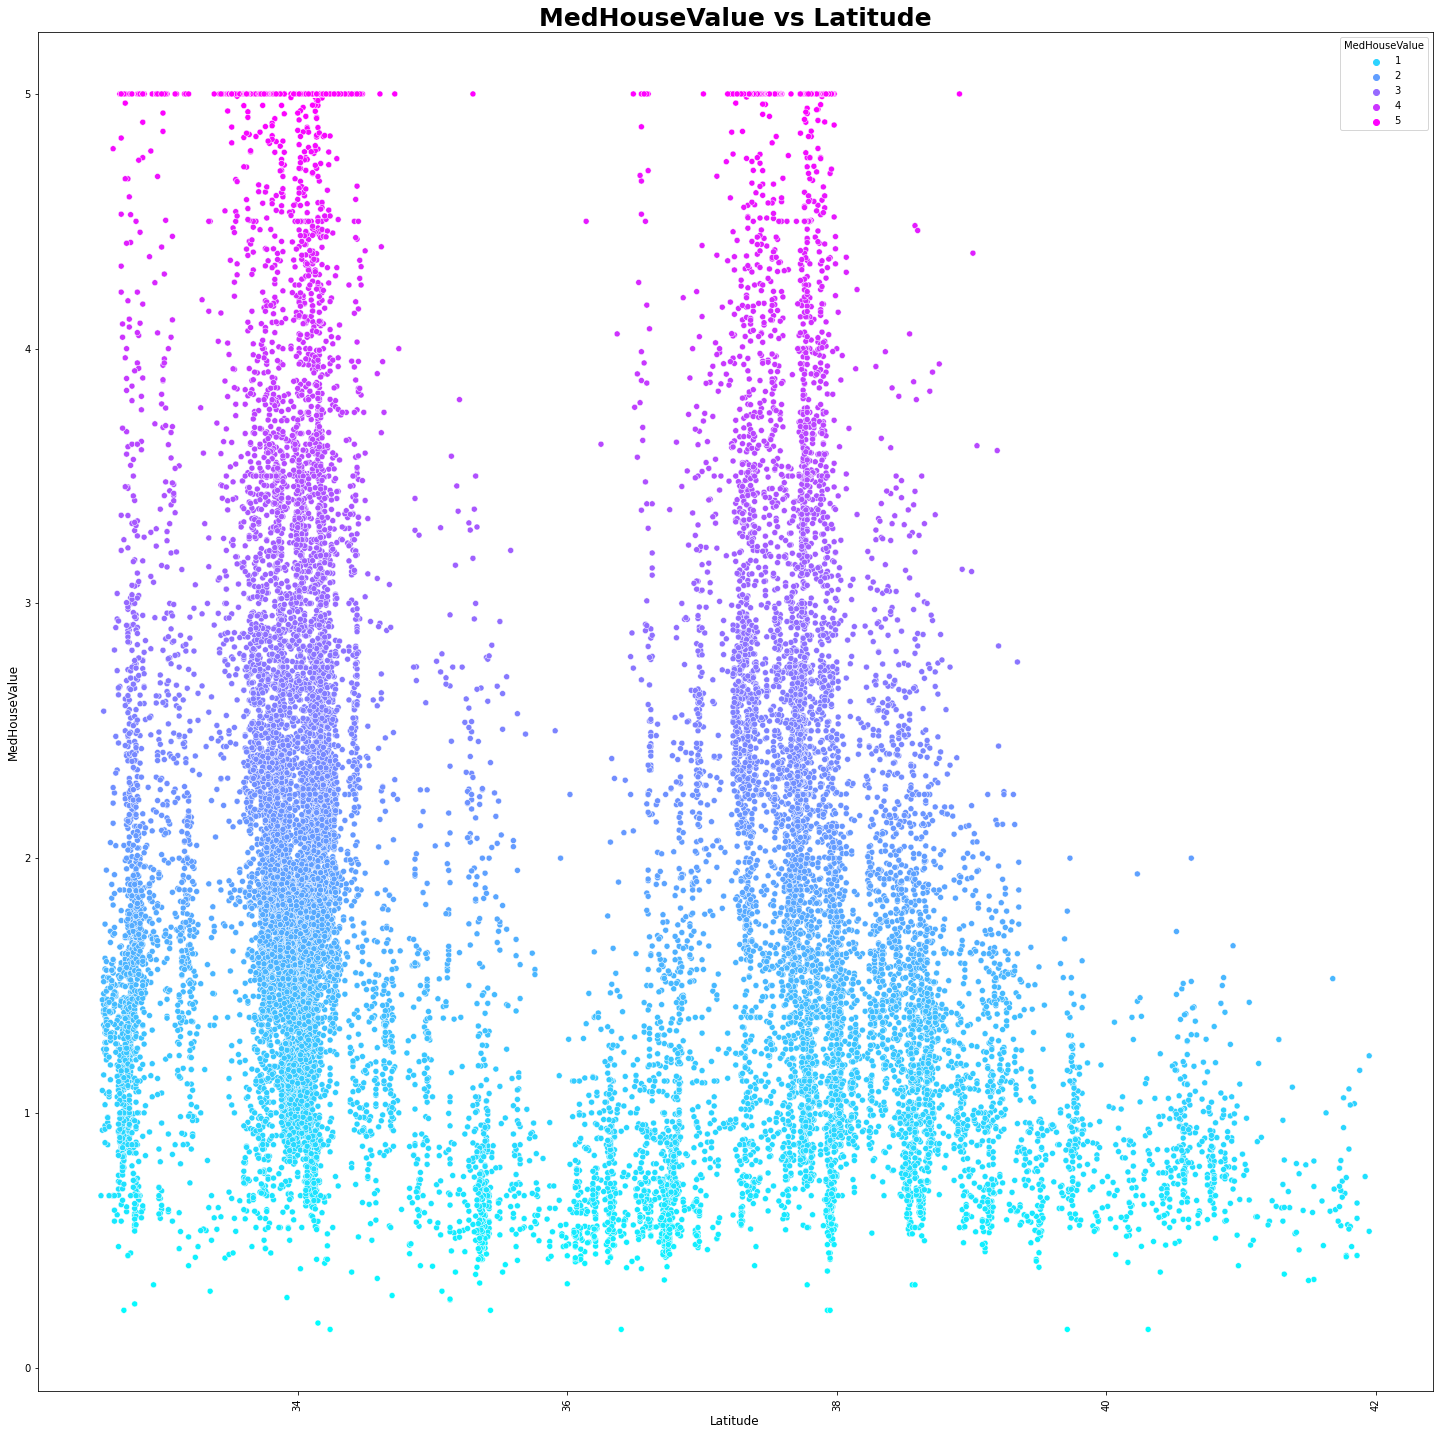

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "Latitude" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs Latitude", fontweight='bold',fontsize = 25)
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

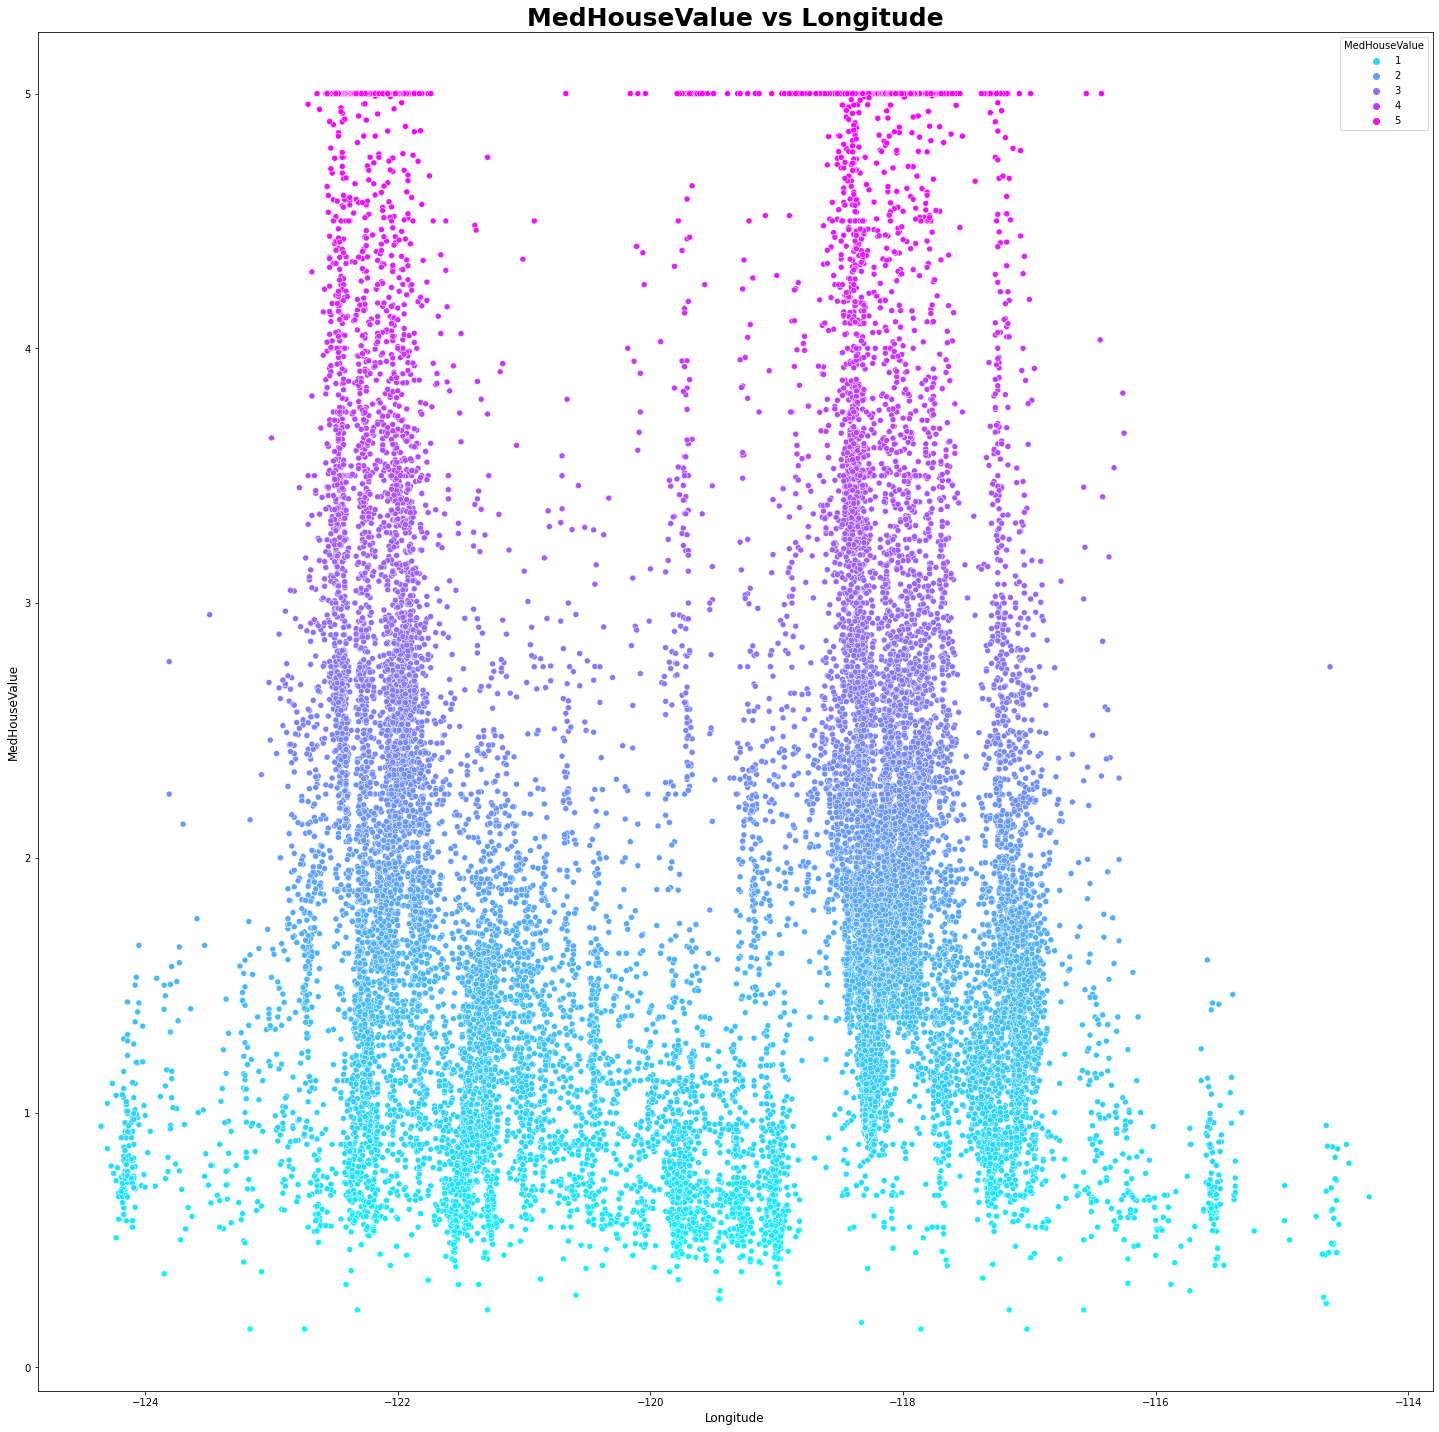

In [ ]:
plt.figure(figsize=(25,25))
sns.scatterplot(data=data_01 , x = "Longitude" ,y = "MedHouseValue" , hue="MedHouseValue" , palette="cool", legend=True)
plt.title("MedHouseValue vs Longitude", fontweight='bold',fontsize = 25)
plt.xlabel('Longitude', fontsize = 12)
plt.ylabel("MedHouseValue", fontsize = 12)
#plt.xticks(rotation=90)
plt.show()

<Figure size 1800x1800 with 0 Axes>

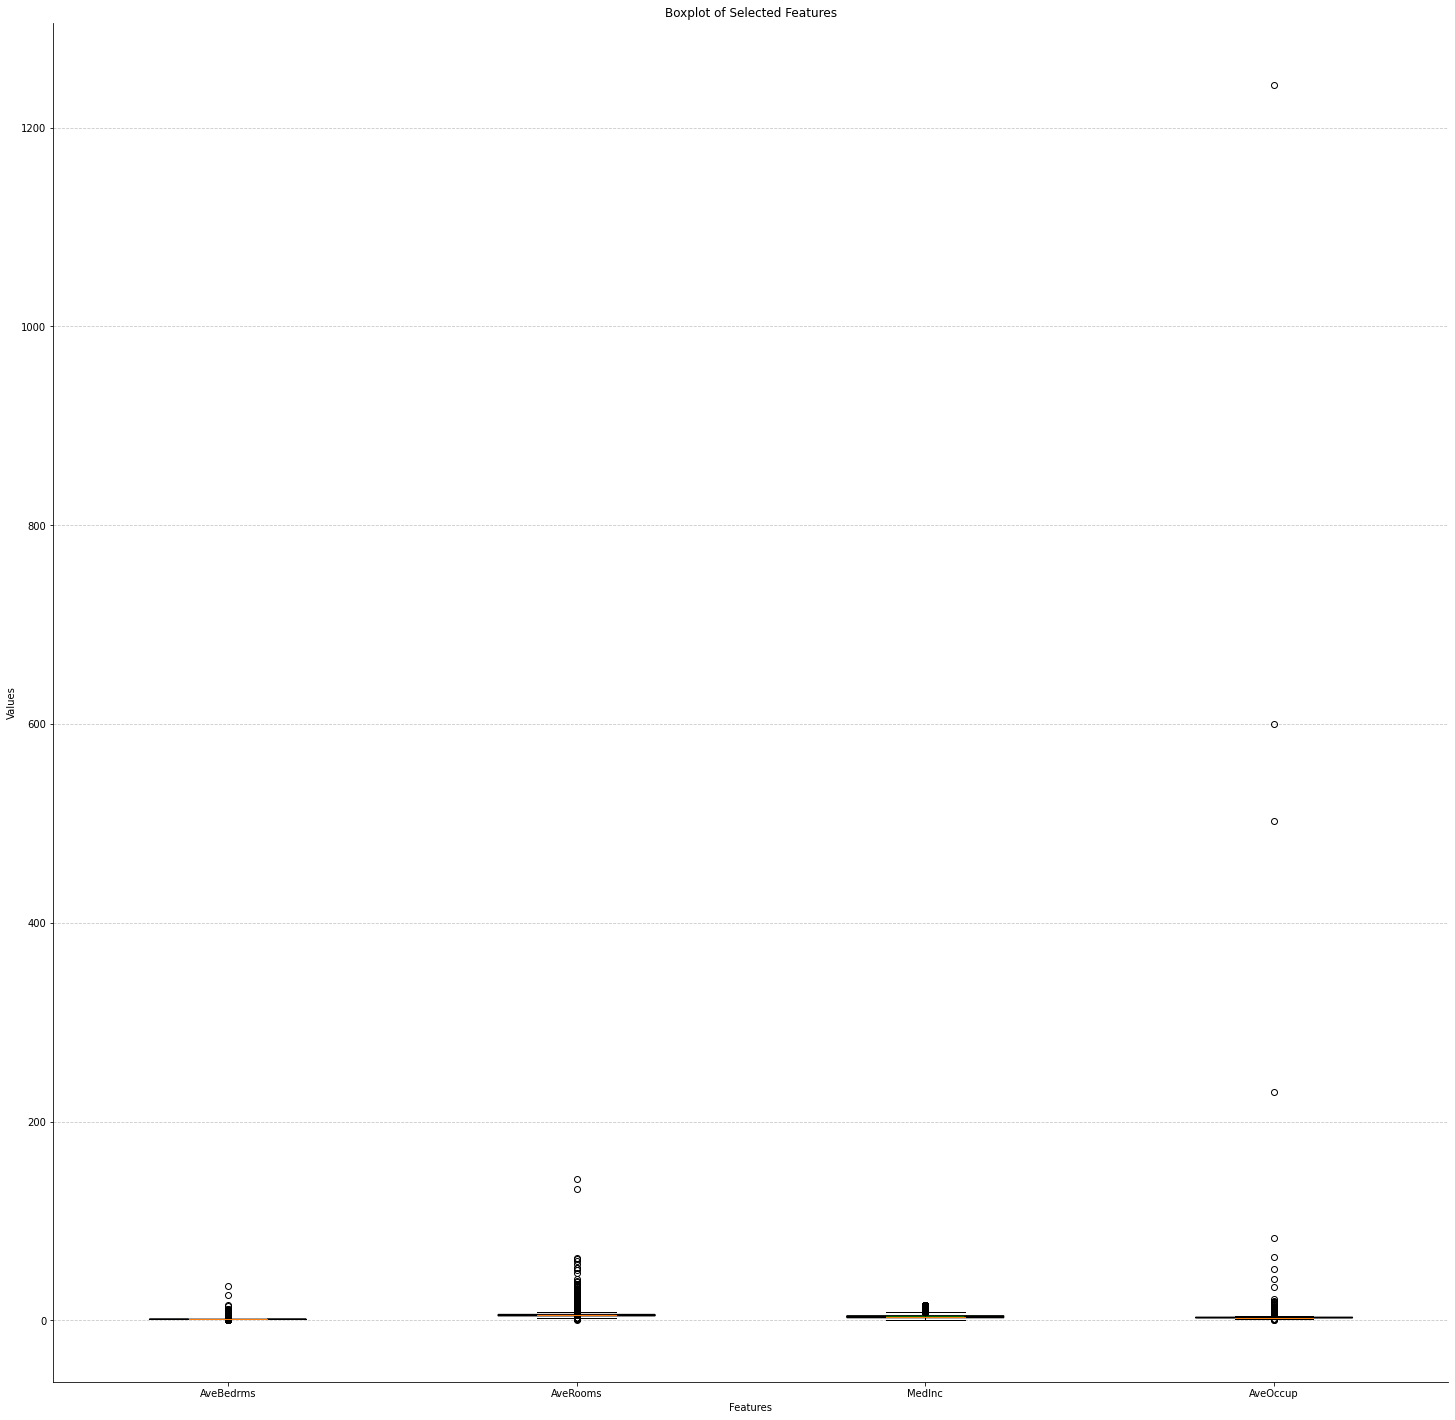

In [ ]:
# Define the colors for each feature
colors = ['blue', 'red', 'green','purple']
# Select the first 5 features to plot
features = ['AveBedrms', 'AveRooms', 'MedInc','AveOccup']
# Create a figure and axis object
plt.figure(figsize=(25,25))
fig, ax = plt.subplots()
# Create a boxplot for each feature
bp = ax.boxplot([data_01[f] for f in features],
 sym='o',
 patch_artist=True,
 notch=True)
# Assign unique colors to each feature
for patch, color in zip(bp['boxes'], colors[:len(features)]):
 patch.set_facecolor(color)
# Customize the x-axis tick labels
ax.set_xticklabels(features)
# Customize the title and axes labels
ax.set_title('Boxplot of Selected Features')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
# Add grid lines and remove top and right spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Set the size of the plot
fig.set_size_inches(25,25)
# Show the plot
plt.show()

#Correlation

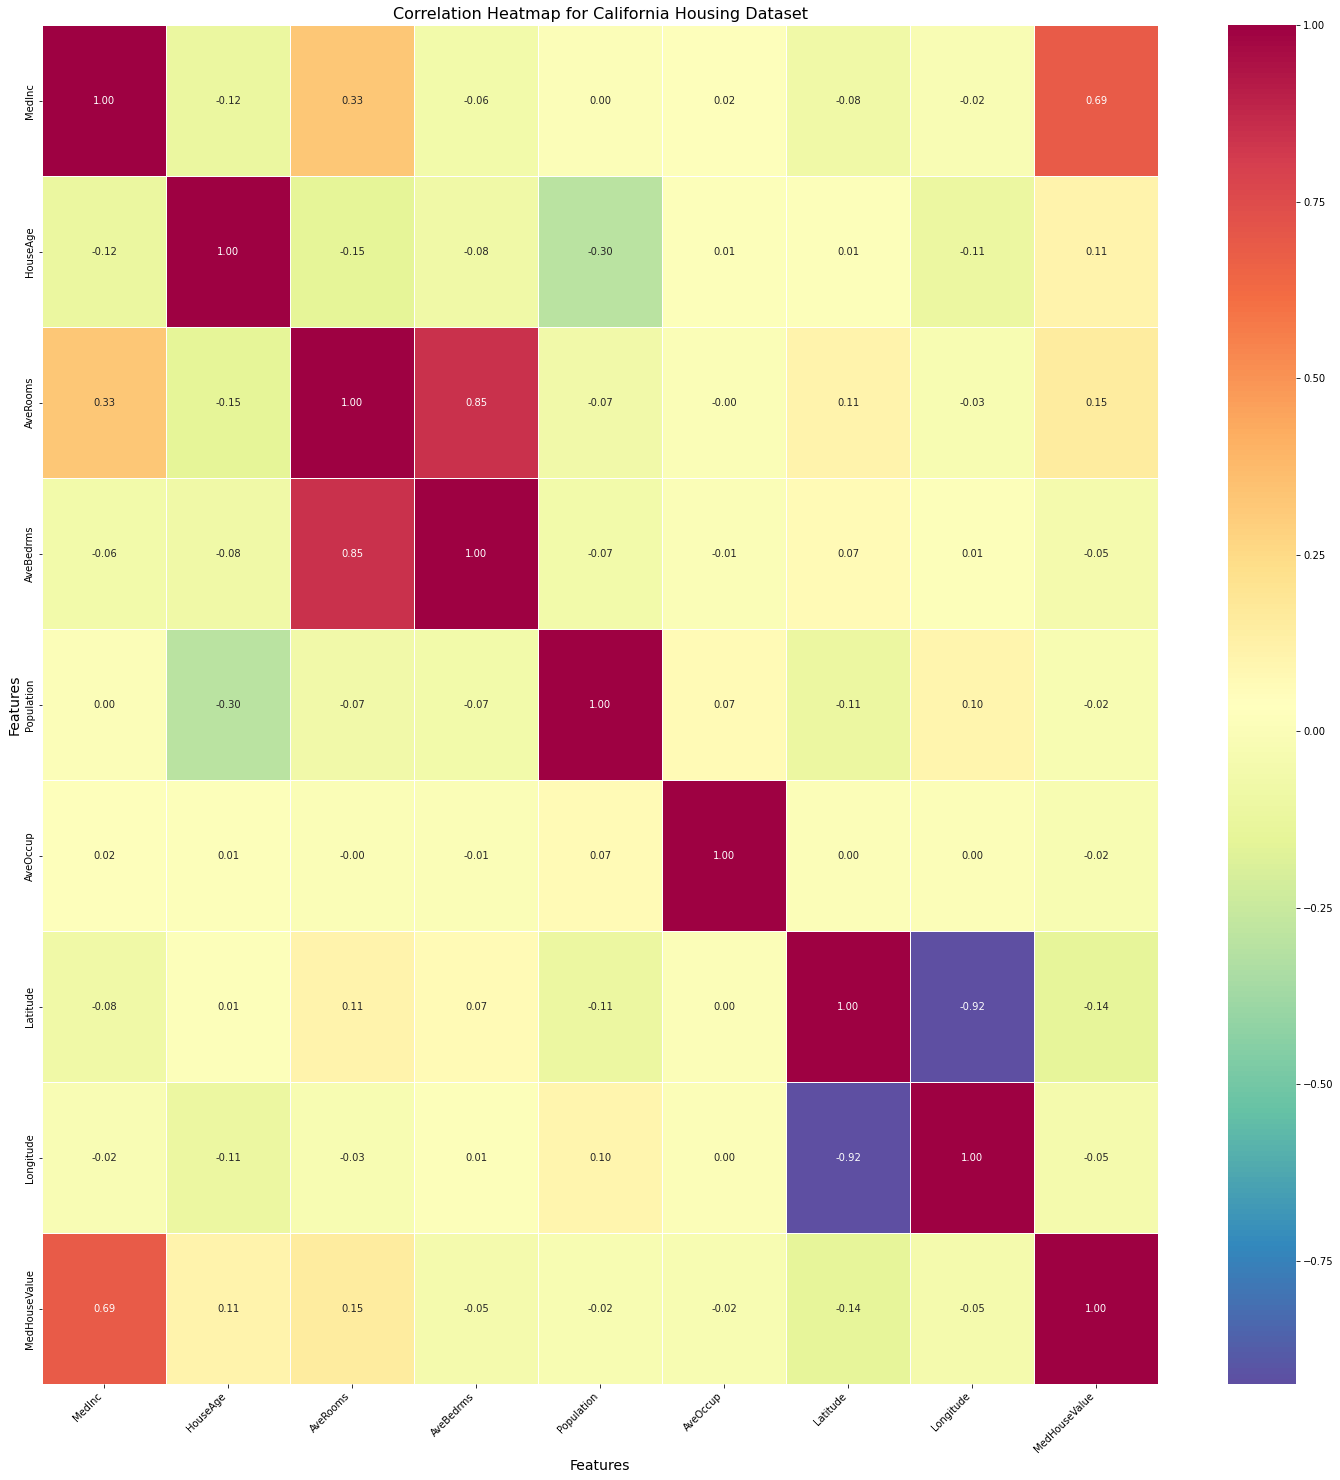

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_01.corr()
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25,25))
# Create the heatmap
sns.heatmap(corr_matrix, cmap='Spectral_r', annot=True, fmt='.2f', linewidths=.5)
# Set the title and axis labels
ax.set_title('Correlation Heatmap for California Housing Dataset', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Features', fontsize=14)
# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

In [ ]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
scaler = StandardScaler()

In [ ]:
california_df_scaled = scaler.fit_transform(data_01)

In [ ]:
california_df_scaled = pd.DataFrame(california_df_scaled, columns=data_01.columns )

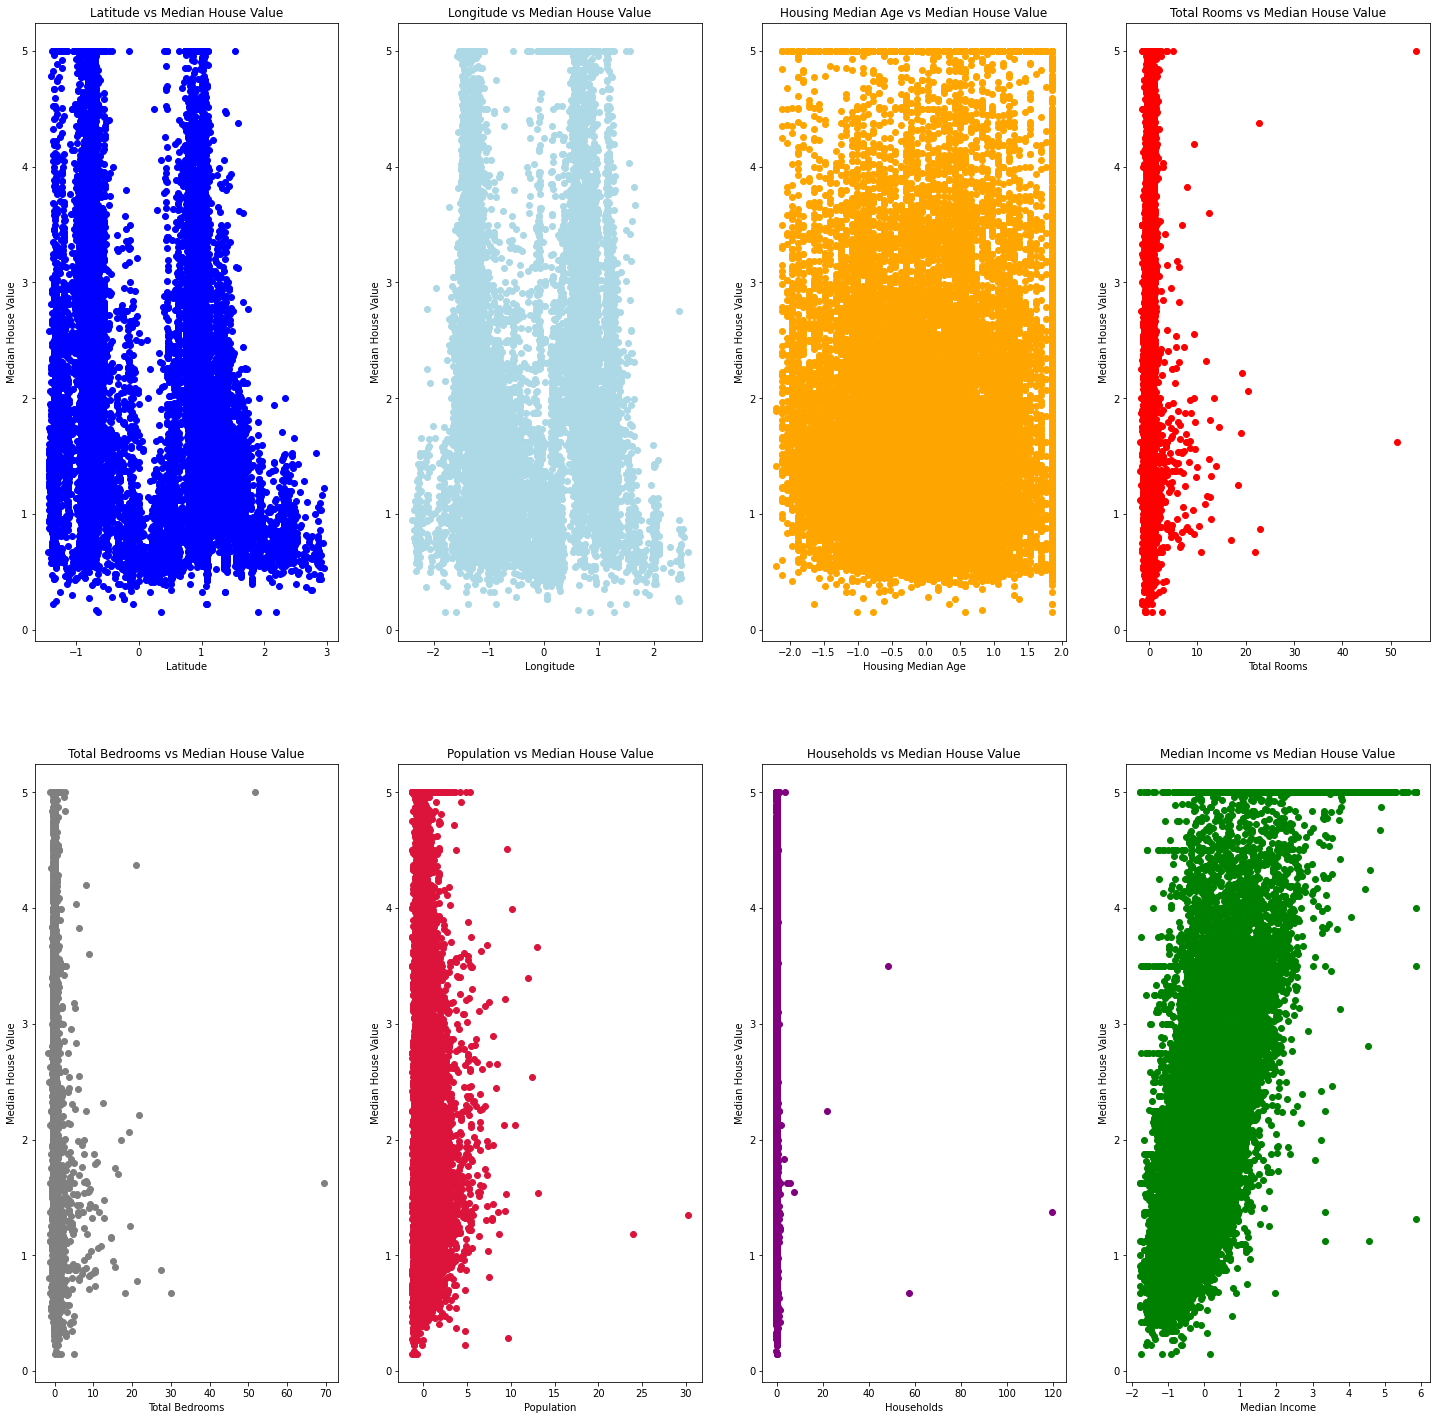

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25,25))

axs[0,0].scatter(california_df_scaled['Latitude'], data_01['MedHouseValue'],color  = "Blue")
axs[0,0].set_xlabel('Latitude')
axs[0,0].set_ylabel('Median House Value')
axs[0,0].set_title('Latitude vs Median House Value')

axs[0,1].scatter(california_df_scaled['Longitude'], data_01['MedHouseValue'],color  = "Lightblue")
axs[0,1].set_xlabel('Longitude')
axs[0,1].set_ylabel('Median House Value')
axs[0,1].set_title('Longitude vs Median House Value')

axs[0,2].scatter(california_df_scaled['HouseAge'], data_01['MedHouseValue'],color  = "Orange")
axs[0,2].set_xlabel('Housing Median Age')
axs[0,2].set_ylabel('Median House Value')
axs[0,2].set_title('Housing Median Age vs Median House Value')

axs[0,3].scatter(california_df_scaled['AveRooms'], data_01['MedHouseValue'],color  = "Red")
axs[0,3].set_xlabel('Total Rooms')
axs[0,3].set_ylabel('Median House Value')
axs[0,3].set_title('Total Rooms vs Median House Value')

axs[1,0].scatter(california_df_scaled['AveBedrms'], data_01['MedHouseValue'],color  = "Grey")
axs[1,0].set_xlabel('Total Bedrooms')
axs[1,0].set_ylabel('Median House Value')
axs[1,0].set_title('Total Bedrooms vs Median House Value')

axs[1,1].scatter(california_df_scaled['Population'], data_01['MedHouseValue'],color  = "Crimson")
axs[1,1].set_xlabel('Population')
axs[1,1].set_ylabel('Median House Value')
axs[1,1].set_title('Population vs Median House Value')

axs[1,2].scatter(california_df_scaled['AveOccup'], data_01['MedHouseValue'],color  = "Purple")
axs[1,2].set_xlabel('Households')
axs[1,2].set_ylabel('Median House Value')
axs[1,2].set_title('Households vs Median House Value')

axs[1,3].scatter(california_df_scaled['MedInc'], data_01['MedHouseValue'],color  = "Green")
axs[1,3].set_xlabel('Median Income')
axs[1,3].set_ylabel('Median House Value')
axs[1,3].set_title('Median Income vs Median House Value')


plt.show()

#Dependant and Independant Variable

In [ ]:
x = california_df_scaled.drop(["MedHouseValue"],axis=1)
y = data_01["MedHouseValue"]

#Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(california.data,california.target, random_state=11)

#Hyperparameters to be tuned and create the Bayesian Ridge model


In [ ]:
# Hyperparameters to be tuned
param_grid = {
 'n_iter': [100, 300, 500],
 'tol': [1e-4, 1e-3, 1e-2],
 'alpha_init': [1e-7, 1e-6, 1e-5],
 'lambda_init': [1e-7, 1e-6, 1e-5]
}

#Hyperparameter tuning with GridSearchCV:

In [ ]:
# Create the Bayesian Ridge model
model = BayesianRidge()

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error")

In [ ]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=BayesianRidge(),
             param_grid={'alpha_init': [1e-07, 1e-06, 1e-05],
                         'lambda_init': [1e-07, 1e-06, 1e-05],
                         'n_iter': [100, 300, 500],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'alpha_init': 1e-05, 'lambda_init': 1e-07, 'n_iter': 100, 'tol': 0.01}


#Train the Bayesian Ridge model with the best parameters

In [ ]:
best_model = BayesianRidge(**best_params)
best_model.fit(X_train, y_train)

BayesianRidge(alpha_init=1e-05, lambda_init=1e-07, n_iter=100, tol=0.01)

#Predictions & Evaluate the model

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Calculate the R^2 score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
# Print the results
print(f'R^2 score: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R^2 score: 0.60
RMSE: 0.73


**Inference from the Model**

The R^2 score of 0.60 suggests that the model explains 65% of the variance in the output variable. While this is not an exceptionally high value, it does suggest that the model has captured a reasonable amount of the relationship between the input features and the output variable. An R^2 score above 0.5 is generally considered decent, but there is still room for improvement.


The RMSE is 0.68. This value tells you that, on average, the model's predictions are off by 0.68 units from the actual values.


#Conclusion

**Conclusion**

In conclusion, this Bayesian Regression tutorial showcased how to effectively model the relationship between input features and the target variable, specifically the median house value in California. We began by loading and preprocessing the dataset, followed by visualizing the relationships between the variables using scatter plots.


We then split the data into training and testing sets and employed Bayesian Regression to fit a model to the training data. Throughout the process, we fine-tuned the model's hyperparameters to achieve an optimal balance between bias and variance. Subsequently,we used the model to make predictions on the test data and evaluated its performance using mean squared error and R-squared score.


The results, with an R^2 score of 0.65 and an RMSE of 0.68, indicate that the Bayesian Regression model has captured a reasonable amount of the relationship between the input features and the target variable, the median house value in California. While the performance is decent, there is still room for improvement. Further refinements, such as feature engineering, model selection, or hyperparameter tuning, could potentially enhance the model's performance, enabling more accurate predictions of house values.